In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

By : Sean Ashley, email : s2ashley@uwaterloo.ca, phone number: 647-224-6075

# Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### Preliminary data exploration

In [32]:
#read in csv as a pandas dataframe
shoe_sales_df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv",index_col = "order_id") 

In [33]:
#take a look at the dataframe structure
shoe_sales_df.head(10)

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11
6,58,882,138,1,credit_card,2017-03-14 15:25:01
7,87,915,149,1,cash,2017-03-01 21:37:57
8,22,761,292,2,cash,2017-03-08 2:05:38
9,64,914,266,2,debit,2017-03-17 20:56:50


In [41]:
#get the amount of data points in our set (5000 rows and 6 columns)
shoe_sales_df.shape

(5000, 6)

In [43]:
#see if we have any null values in our columns of interest that we may have to remove
print(shoe_sales_df["order_amount"].isna().sum())

print(shoe_sales_df["total_items"].isna().sum())
#No null values, great!

0
0


### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [34]:
#calculate AOV only using order_amount
shoe_sales_df["order_amount"].mean()

3145.128

In [35]:
#get all unique values for total_items
shoe_sales_df["total_items"].unique()

array([   2,    1,    3, 2000,    4,    5,    6,    8])

In [36]:
#get the average amount of pairs of sneakers ordered per order_id
shoe_sales_df["total_items"].unique().mean()

253.625

### Think about what could be going wrong with our calculation.
It seems like this is how we are getting our AOV of $3145.13. The clear problem here is that we are not getting the average sell price of individual sneakers, but the total order_amount for all of the pairs of sneakers orders.

As can be seen above, it is not always 1 pair of sneakers being ordered, but sometimes 3,5, or even 2000 sneakers being ordered, which would inflate the total order amount.

In fact the average amount of sneakers ordered per order_id is 254 pairs.




### Think about a better way to evaluate this data. 

A better way to evaluate this data would be to just take either median or mean sell price of individual pairs of sneakers.

If we wanted the sale price for an individual pair of sneakers, we would have to divide the order amount by the total items.

It would then be wise to take a look at a histogram of the sneaker prices to see what type of distribution we have, and from there we can decide on using either mean or median sale value.

### b. What metric would you report for this dataset?

Text(0, 0.5, 'Frequency')

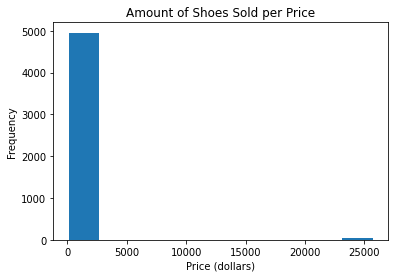

In [37]:
#divide order_amount column by the total_items column  to get order amount per sneaker
price_per_sneaker = shoe_sales_df["order_amount"] / shoe_sales_df["total_items"]

#convert to a numpy array so we can pass it to a  histogram
price_per_sneaker = price_per_sneaker.values

#print(price_per_sneaker.max())
#graph values in a histogram to see distribution
plot = plt.hist(price_per_sneaker,bins = 10)
plt.title("Amount of Shoes Sold per Price")
plt.xlabel("Price (dollars)")
plt.ylabel("Frequency")

In [40]:
unique_vals,count = np.unique(price_per_sneaker,return_counts = True)
unique_vals,count

(array([   90.,    94.,   101.,   111.,   112.,   114.,   116.,   117.,
          118.,   122.,   127.,   128.,   129.,   130.,   131.,   132.,
          133.,   134.,   136.,   138.,   140.,   142.,   144.,   145.,
          146.,   147.,   148.,   149.,   153.,   154.,   155.,   156.,
          158.,   160.,   161.,   162.,   163.,   164.,   165.,   166.,
          168.,   169.,   171.,   172.,   173.,   176.,   177.,   178.,
          181.,   184.,   187.,   190.,   193.,   195.,   196.,   201.,
          352., 25725.]),
 array([ 42,  55,  42,  40, 124,  59,  58,  77, 118,  50,  52,  93, 142,
        150,  97,  46, 151,  86, 105,  59,  55, 197,  39,  92,  89,  53,
        101,  52, 256,  54,  42, 197,  94, 206, 101,  48, 122, 161,  58,
         43,  39,  54,  48,  35,  99, 152, 148, 109, 112,  49, 105,  35,
         44,  54,  61,  53,  51,  46]))

It seems most of the shoes are in the same general interval except for 46/5000 shoes which cost $25725 per pair.

Lets remove any values that are past +/- 3 standard deviations to calculate the trimmed mean, which would probably be much more useful to Shopify and our vendors. The vast majority of vendors will be selling withing that range of prices, so including the massive outliers would make the mean or median much less informative.

In [47]:
#calculate standard deviation of shoe order
shoes_stdev = np.std(price_per_sneaker)
shoes_stdev

2441.719516784874

In [55]:

#upper bound in standard deviation * 3
upper_bound = shoes_stdev * 3
#lower bound will just be 0, so we do not need to set it explicitly as there are no shoe prices below zero
print("Min shoe price is: ",np.min(price_per_sneaker))


#delete all values that dont fall within 3 stdevs
price_per_sneaker_trimmed = np.delete(price_per_sneaker, np.where(price_per_sneaker >= upper_bound))
price_per_sneaker_trimmed

Min shoe price is:  90.0


array([112.,  90., 144., ..., 117., 177., 144.])

Text(0, 0.5, 'Frequency')

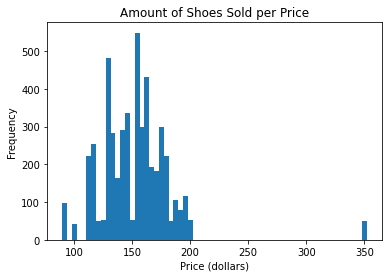

In [56]:

#graph values in a histogram to see distribution
plot = plt.hist(price_per_sneaker_trimmed,bins = "auto")
plt.title("Amount of Shoes Sold per Price")
plt.xlabel("Price (dollars)")
plt.ylabel("Frequency")

Seems we have a mostly normal distribution here, so mean and median should not be too different, lets calculate them

In [57]:
#calculate trimmed mean
trimmed_mean = price_per_sneaker_trimmed.mean()
trimmed_median = np.median(price_per_sneaker_trimmed)

print("Trimmed mean is: ", trimmed_mean)
print("Trimmed median is: ", trimmed_median)


Trimmed mean is:  152.47557529269278
Trimmed median is:  153.0


As expected both values are very close, but since the original question wanted AOV (average order value), lets use the mean.

** The metric that will be used is the trimmed mean (mean with outliers removed) sale price of individual pairs of sneakers. This is because it provides useful information to both Shopfiy and vendors on what they can expect their sneakers to sell for on average **

### c. What is its value?

** As shown above the rimmed mean sale price of individual pairs of sneakers is $152.48 **